# Classification avec `python`


In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from sklearn.preprocessing import scale

## Données Iris

Sur lesquels on réalise une ACP pour projeter les partitions sur le premier plan factoriel

In [3]:
iris = pandas.read_table("https://fxjollois.github.io/donnees/Iris.txt", sep = "\t")
iris2 = iris.drop("Species", axis = 1)
iris2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
pca = PCA(n_components = 2)
pca.fit(scale(iris2))

PCA(n_components=2)

In [5]:
iris_pca = pandas.DataFrame(pca.transform(scale(iris2)), 
                               columns = ["Dim1", "Dim2"])

## CAH

In [6]:
hac = AgglomerativeClustering(n_clusters = 3)
hac.fit(scale(iris2))

AgglomerativeClustering(n_clusters=3)

In [7]:
iris.assign(cah = hac.labels_).groupby("cah").mean().round(2)

,Sepal Length,Sepal Width,Petal Length,Petal Width
cah,,,,
0,6.55,2.99,5.27,1.85
1,5.02,3.45,1.47,0.24
2,5.53,2.57,3.93,1.21


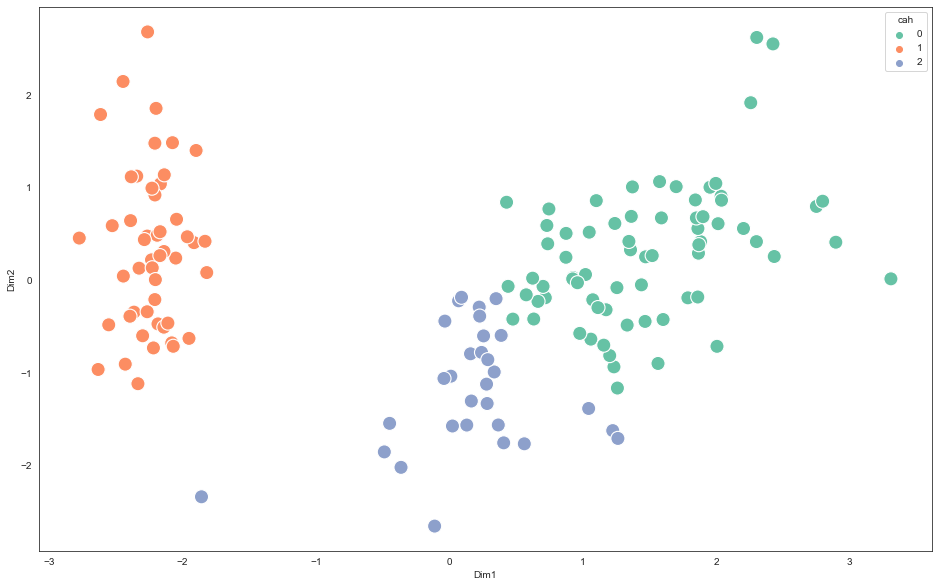

In [8]:
plt.figure(figsize = (16, 10))
seaborn.scatterplot(data = iris_pca.assign(cah = hac.labels_),
                    x = "Dim1", y = "Dim2", hue = "cah", palette = "Set2", s = 200)
plt.show()

## $k$-means

In [9]:
kmeans = KMeans(n_clusters = 3, init = "random", n_init = 20)
kmeans.fit(scale(iris2))

KMeans(init='random', n_clusters=3, n_init=20)

In [10]:
iris.assign(kmeans = kmeans.labels_).groupby("kmeans").mean().round(2)

,Sepal Length,Sepal Width,Petal Length,Petal Width
kmeans,,,,
0,5.80,2.67,4.37,1.41
1,6.78,3.10,5.51,1.97
2,5.01,3.43,1.46,0.25


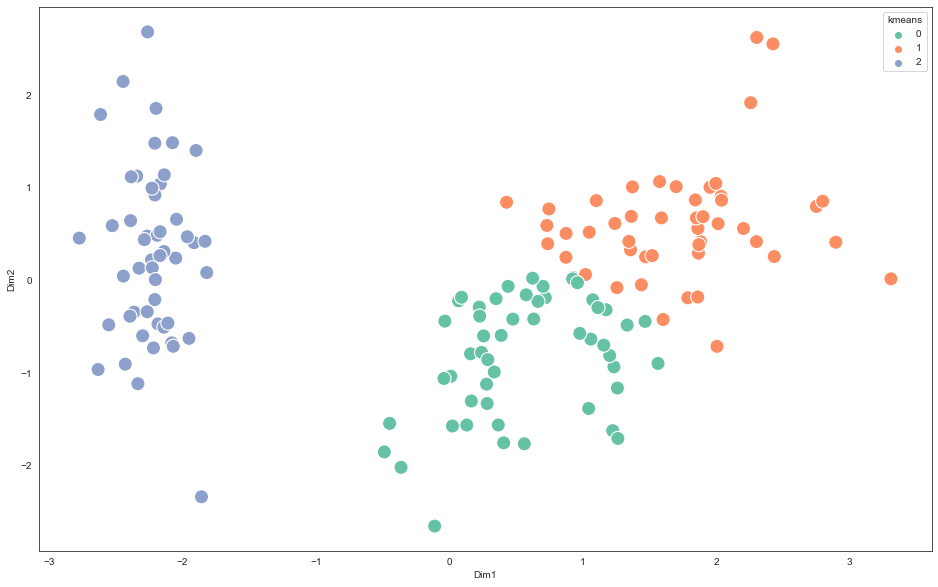

In [11]:
plt.figure(figsize = (16, 10))
seaborn.scatterplot(data = iris_pca.assign(kmeans = kmeans.labels_),
                    x = "Dim1", y = "Dim2", hue = "kmeans", palette = "Set2", s = 200)
plt.show()

## DBSCAN

In [12]:
db = DBSCAN(eps = .6, min_samples = 3)
db.fit(scale(iris2))

DBSCAN(eps=0.6, min_samples=3)

In [13]:
iris.assign(dbscan = db.labels_).groupby("dbscan").mean().round(2)

,Sepal Length,Sepal Width,Petal Length,Petal Width
dbscan,,,,
-1,6.40,2.81,5.02,1.64
0,5.02,3.45,1.47,0.24
1,6.27,2.91,4.92,1.69
2,5.00,2.40,3.20,1.03
3,6.17,2.23,4.63,1.43


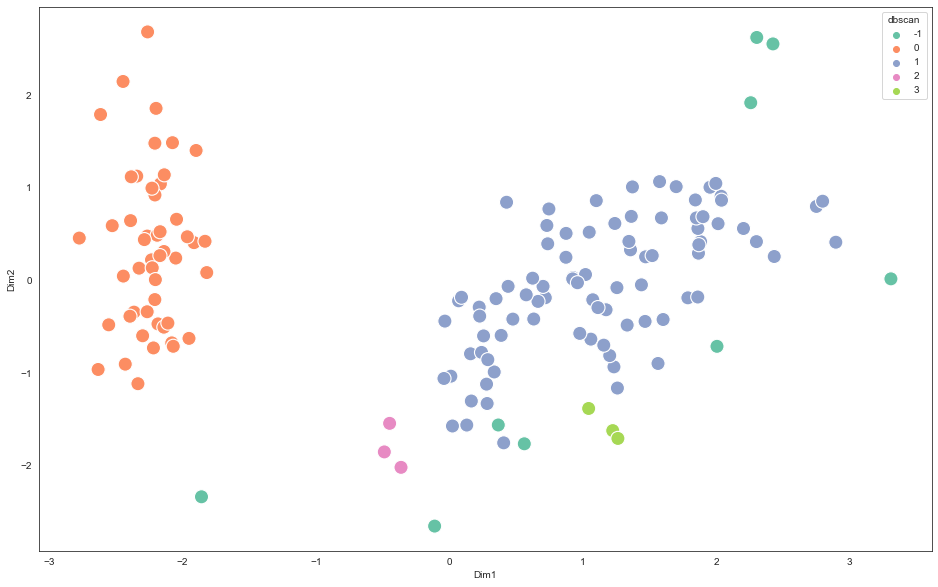

In [14]:
plt.figure(figsize = (16, 10))
seaborn.scatterplot(data = iris_pca.assign(dbscan = db.labels_),
                    x = "Dim1", y = "Dim2", hue = "dbscan", palette = "Set2", s = 200)
plt.show()

## Comparaison des partitions avec les espèces

In [15]:
pandas.crosstab(hac.labels_, iris.Species)

Species,setosa,versicolor,virginica
row_0,,,
0,0,23,48
1,49,0,0
2,1,27,2


In [16]:
pandas.crosstab(kmeans.labels_, iris.Species)

Species,setosa,versicolor,virginica
row_0,,,
0,0,39,14
1,0,11,36
2,50,0,0


In [17]:
pandas.crosstab(db.labels_, iris.Species)

Species,setosa,versicolor,virginica
row_0,,,
-1,1,2,6
0,49,0,0
1,0,43,43
2,0,3,0
3,0,2,1


## Comparaison des partitions entre elles

In [18]:
pandas.crosstab(kmeans.labels_, hac.labels_)

col_0,0,1,2
row_0,,,
0,24,0,29
1,47,0,0
2,0,49,1


## Représentation graphique des classes

<AxesSubplot:xlabel='Species', ylabel='Sepal Length'>

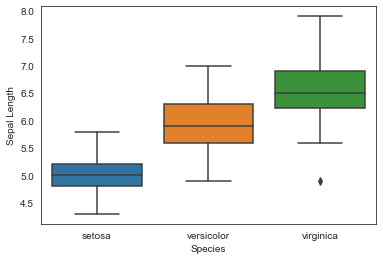

In [19]:
seaborn.boxplot(data = iris, x = "Species", y = "Sepal Length")

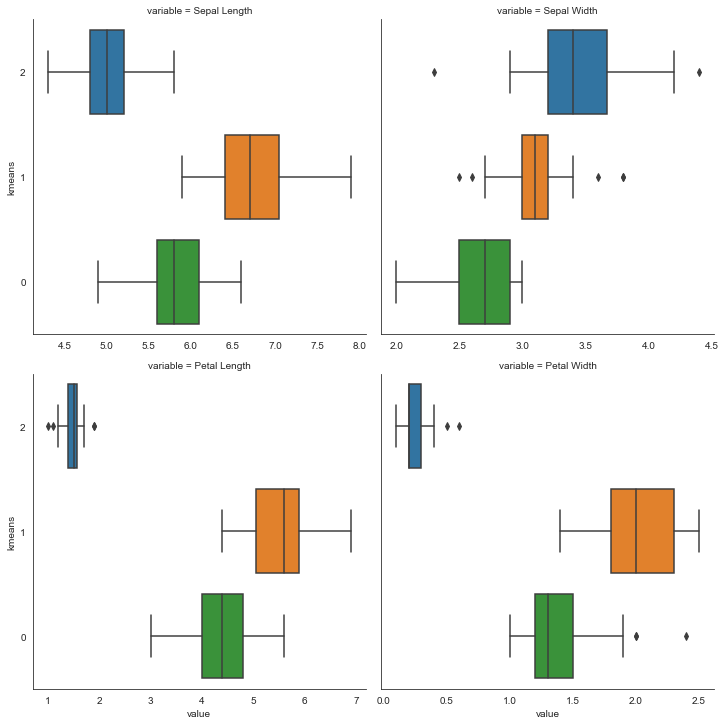

In [20]:
seaborn.catplot(data = iris2.assign(kmeans = [str(v) for v in kmeans.labels_]).melt(id_vars = "kmeans"),
                y = "kmeans", x = "value",
                col = "variable", col_wrap = 2, sharex = False,
                kind = "box")